# Cross-validation

In [1]:
import numpy as np
images = np.load('MNIST/mnist_images.npy')
labels = np.load('MNIST/mnist_labels.npy')

# Note the use of SKLearn to do the train-test split
from sklearn.cross_validation import train_test_split

# Ignore possible warning messages
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=1000, test_size=1000, random_state=0)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


As we know, most of the classifiers have hyper-parameters, tuning which we can improve their performance, for example number of neighbours `k` in KNN.

**Exercise**: For values of `k` from 1 to 10, train the K-nearest neighbor classifier (use sklearn) on the training set, evaluate its accuracy on the test set, and find the optimal value for `k`.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = np.zeros(10)

for k in k_choices:
    model = KNeighborsClassifier(k)
    model.fit(train_images, train_labels)
    scores[k - 1] = model.score(test_images, test_labels)
    
print scores

[ 0.91   0.871  0.893  0.879  0.871  0.873  0.872  0.873  0.87   0.87 ]


Let's plot them 

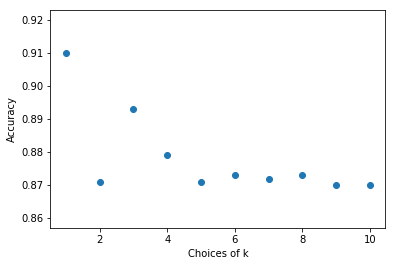

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(k_choices, scores)
plt.xlabel('Choices of k')
plt.ylabel('Accuracy')
plt.show()

In [6]:
# Find the best one (which is the first one, as we see)
best_k = np.argmax(scores) + 1
best_k

1

Note, however, that after we have picked the *k* with the best score on the test set, its score is an overestimation of its true accuracy (think why!).

Thus, whenever model selection is involved, we should always have a *third*, separate "evaluation set", to test the final performance of our model.

In practice, cross-validation is often used to perform model selection, and sklearn has a method for doing it in a couple of lines of code.

In [7]:
from sklearn.grid_search import GridSearchCV
model = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': k_choices}, cv=3)
model.fit(train_images[0:2000,], train_labels[0:2000]) # Slow-ish

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Let's look at the best parameter and final score:

In [8]:
print "Model with k = %d achieved the highest accuracy of %f" % (model.best_params_['n_neighbors'], model.best_score_)

Model with k = 1 achieved the highest accuracy of 0.849000


This score is more realistic estimate of how our KNN model can generalise to unseen data.

**Exericse**: Pick few more favourite classifiers from [here](http://scikit-learn.org/stable/supervised_learning.html) and experiment with thier hyper-parameters. Report the model with the highest accuracy.

In [13]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV

model = GridSearchCV( svm.SVC(), {'kernel': ["linear", "poly"], 'C': [1, 100, 1000, 2000]}, cv = 5, n_jobs = -1)
model.fit(train_images[0:2000,], train_labels[0:2000])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'poly'], 'C': [1, 100, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
model.best_params_

{'C': 1, 'kernel': 'linear'}

In [15]:
model.best_score_

0.885